# Predicting whether a customer will default on his/her credit card

In [47]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# About Dataset
### Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?
Acknowledgements
Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.




In [2]:
# importing tha dataset
data = pd.read_csv("data/UCI_Credit_Card.csv")
data.shape

(30000, 25)

In [3]:
# Type of the dataframe
type(data)

pandas.core.frame.DataFrame

In [4]:
# No. of rows and columns in dataframe
print(data.shape)

(30000, 25)


In [5]:
# First five rows of dataframe
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# Columns gives all the featues name
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
# Info on Non-Null Count and data type for each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
# Checking for null values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
# unique values in each column
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [10]:
# duplicate values in each column
data.duplicated().sum()

0

In [11]:
# Describe gives the statistical inference of numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# Output variable

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

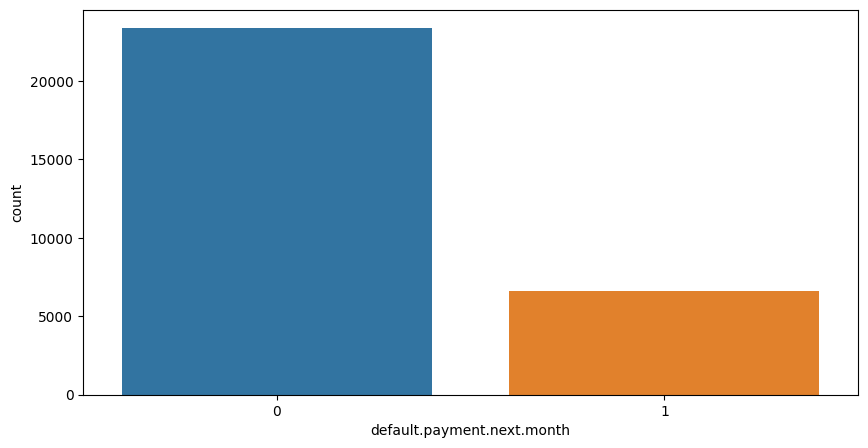

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default.payment.next.month', data = data)

In [13]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

*As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.*

# Independent Variable

## 1. Categorical Features

We have few categorical features in our dataset. Let'Check how they are related with out target class.

### SEX

1 - Male  
2 - Female  

In [14]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

### Education

1 = graduate school  
2 = university  
3 = high school  
4 = others  

In [15]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others

In [16]:
data[(data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
47,48,150000.0,2,5,2,46,0,0,-1,0,...,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,1
69,70,20000.0,1,5,2,22,2,0,0,0,...,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,0
385,386,410000.0,2,5,1,42,0,0,0,0,...,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,0
502,503,230000.0,2,6,2,46,0,0,0,0,...,186635.0,189896.0,193351.0,10000.0,9000.0,8000.0,8000.0,7500.0,7000.0,0
504,505,30000.0,1,6,1,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,29812,50000.0,1,5,2,46,0,0,0,-1,...,19183.0,19563.0,19157.0,1423.0,1000.0,19183.0,687.0,696.0,776.0,0
29836,29837,180000.0,1,6,1,34,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29839,29840,150000.0,1,5,1,36,0,0,0,0,...,136378.0,139219.0,142172.0,5500.0,3800.0,3900.0,4000.0,4100.0,4100.0,0
29920,29921,50000.0,1,5,1,45,2,0,0,0,...,50947.0,51020.0,0.0,3000.0,3428.0,2002.0,1023.0,0.0,0.0,1


In [17]:
fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = 4
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Marriage

1 = married   
2 = single   
3 = others  

In [18]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [19]:
fil = (data['MARRIAGE'] == 0)
data.loc[fil, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Plotting our categorical features

In [20]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [22]:
df_cat = data[categorical_features]
df_cat['Defaulter'] = data['default.payment.next.month']

c:\Users\mkumawat\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0


<Figure size 1000x500 with 0 Axes>

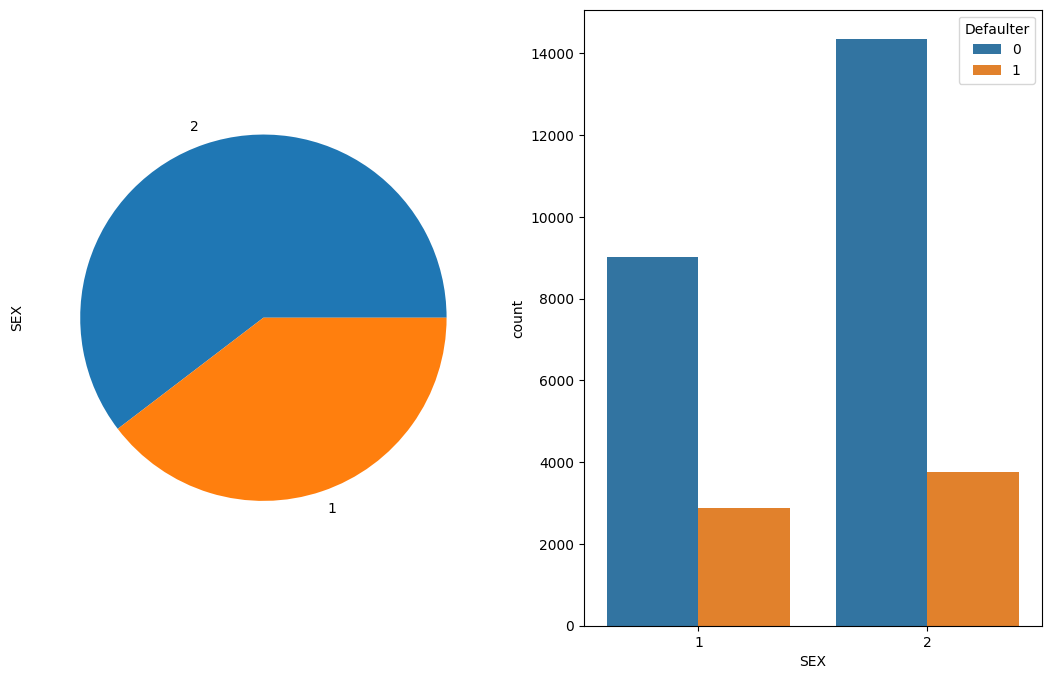

<Figure size 1000x500 with 0 Axes>

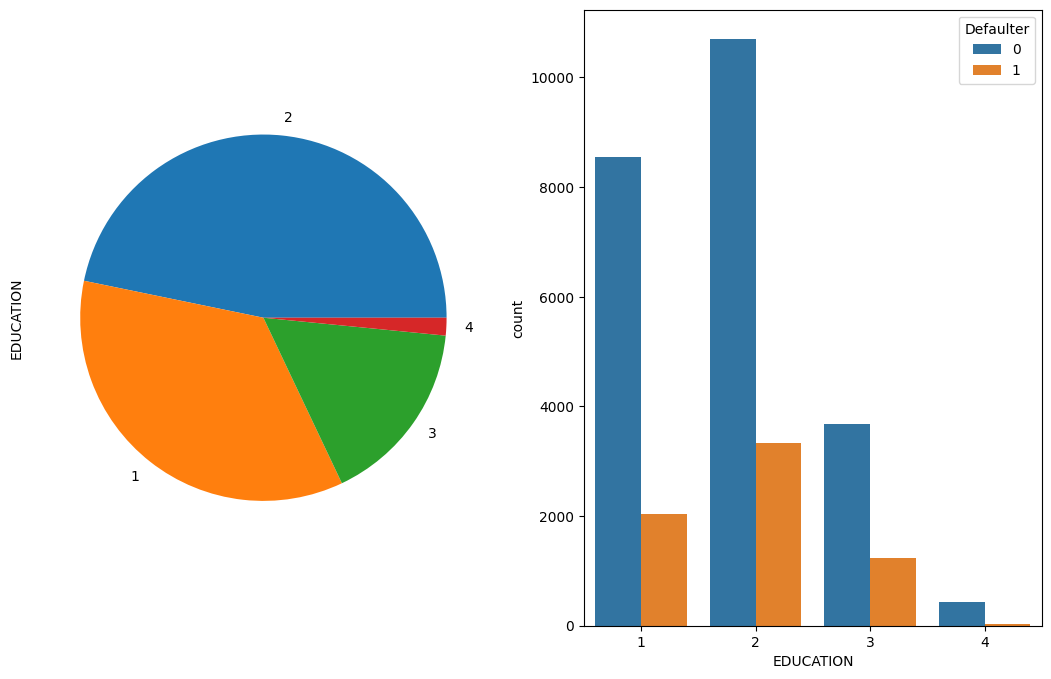

<Figure size 1000x500 with 0 Axes>

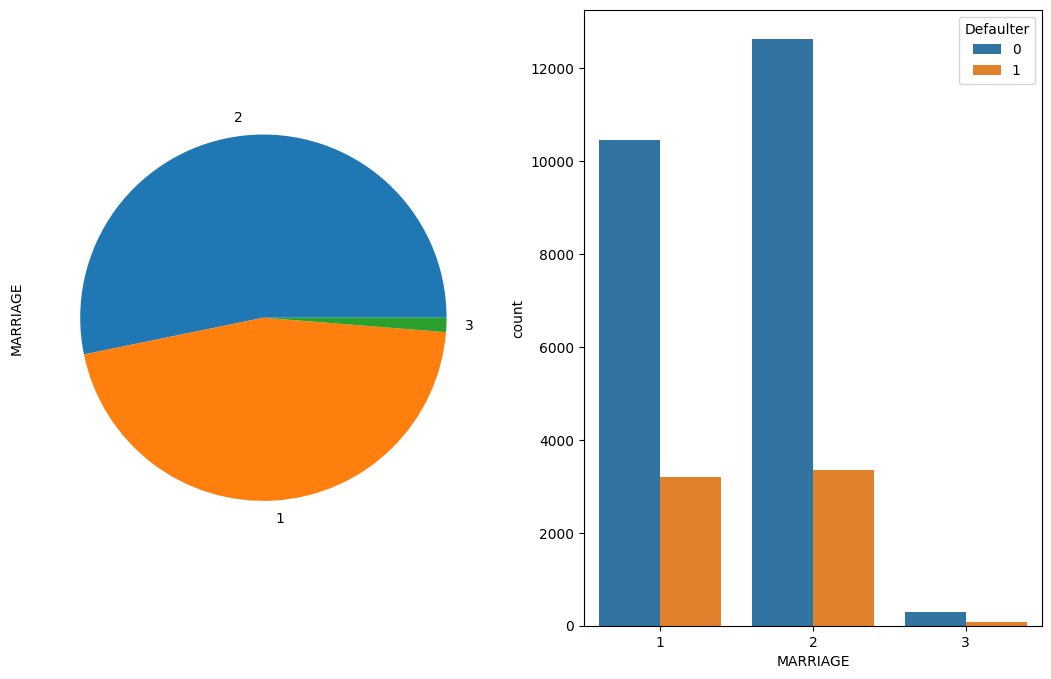

In [24]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  data[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:

1. There are more females credit card holder,so no. of defaulter have high proportion of females.
2. No. of defaulters have a higher proportion of educated people (graduate school and university)
3. No. of defaulters have a higher proportion of Singles.

## 2. Numerical Features

### Limit Balance

In [25]:
data['LIMIT_BAL'].max()

1000000.0

In [26]:
data['LIMIT_BAL'].min()

10000.0

In [27]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<AxesSubplot:xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

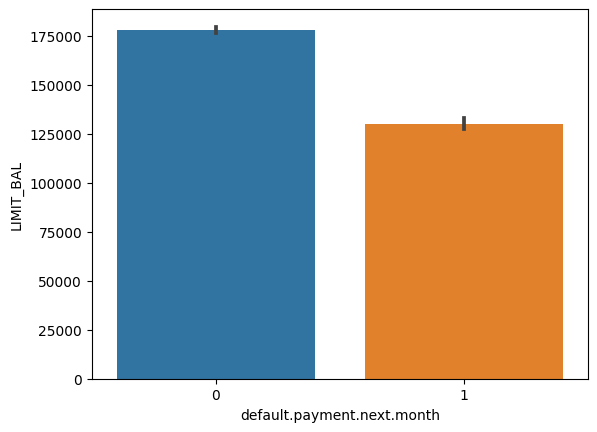

In [28]:
sns.barplot(x='default.payment.next.month', y='LIMIT_BAL', data=data)

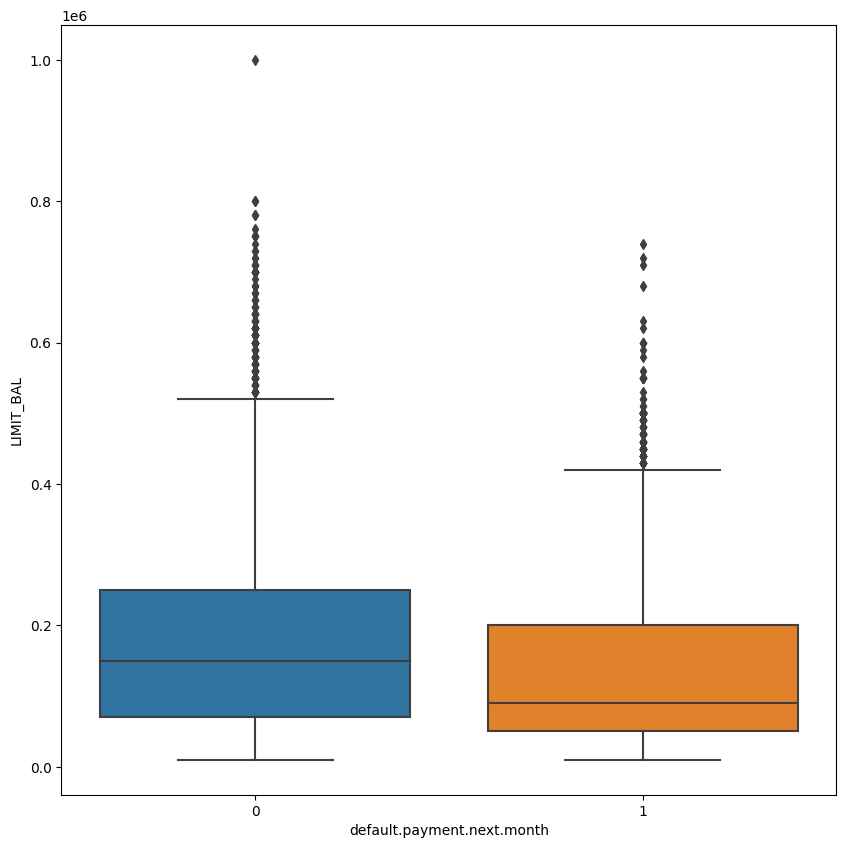

In [29]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=data)

### AGE

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [30]:
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [31]:
data['AGE']=data['AGE'].astype('int')

<AxesSubplot:xlabel='index', ylabel='AGE'>

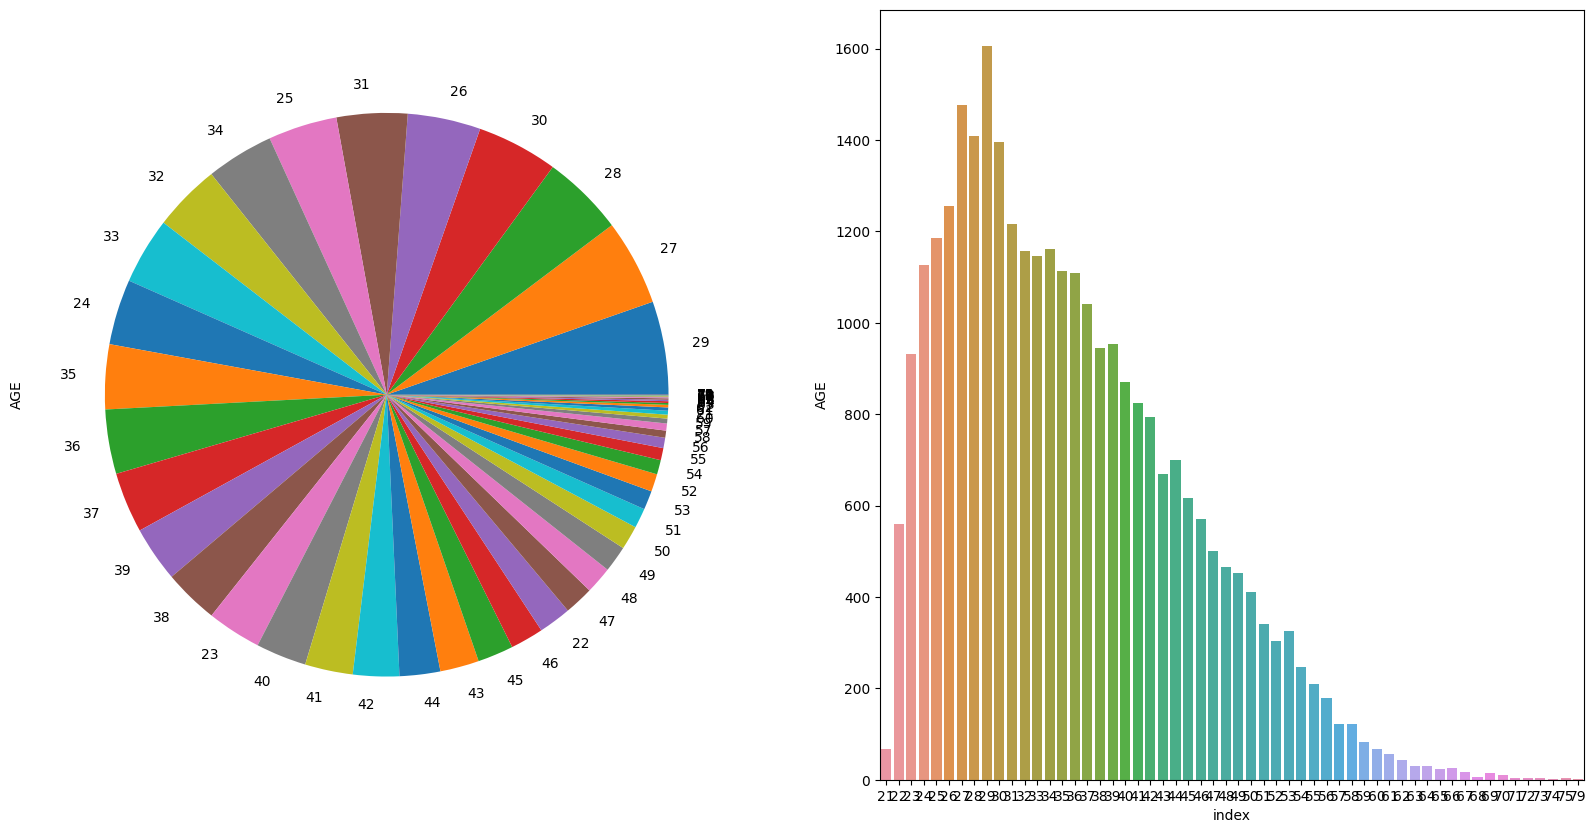

In [32]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
age_df=data['AGE'].value_counts().reset_index()
data['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=age_df,ax = axes[1],orient='v')

In [37]:
data.groupby('default.payment.next.month')['AGE'].mean()

default.payment.next.month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [38]:
data = data.astype('int')

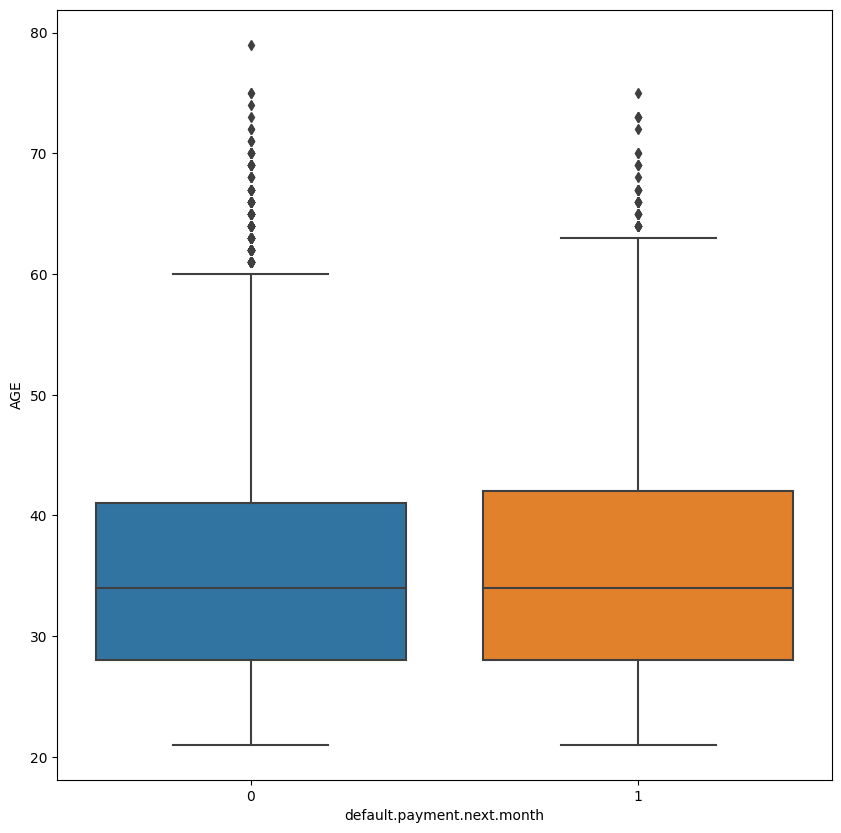

In [39]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default.payment.next.month", y="AGE", data=data)

### Bill Amount

In [40]:
bill_amnt_data = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

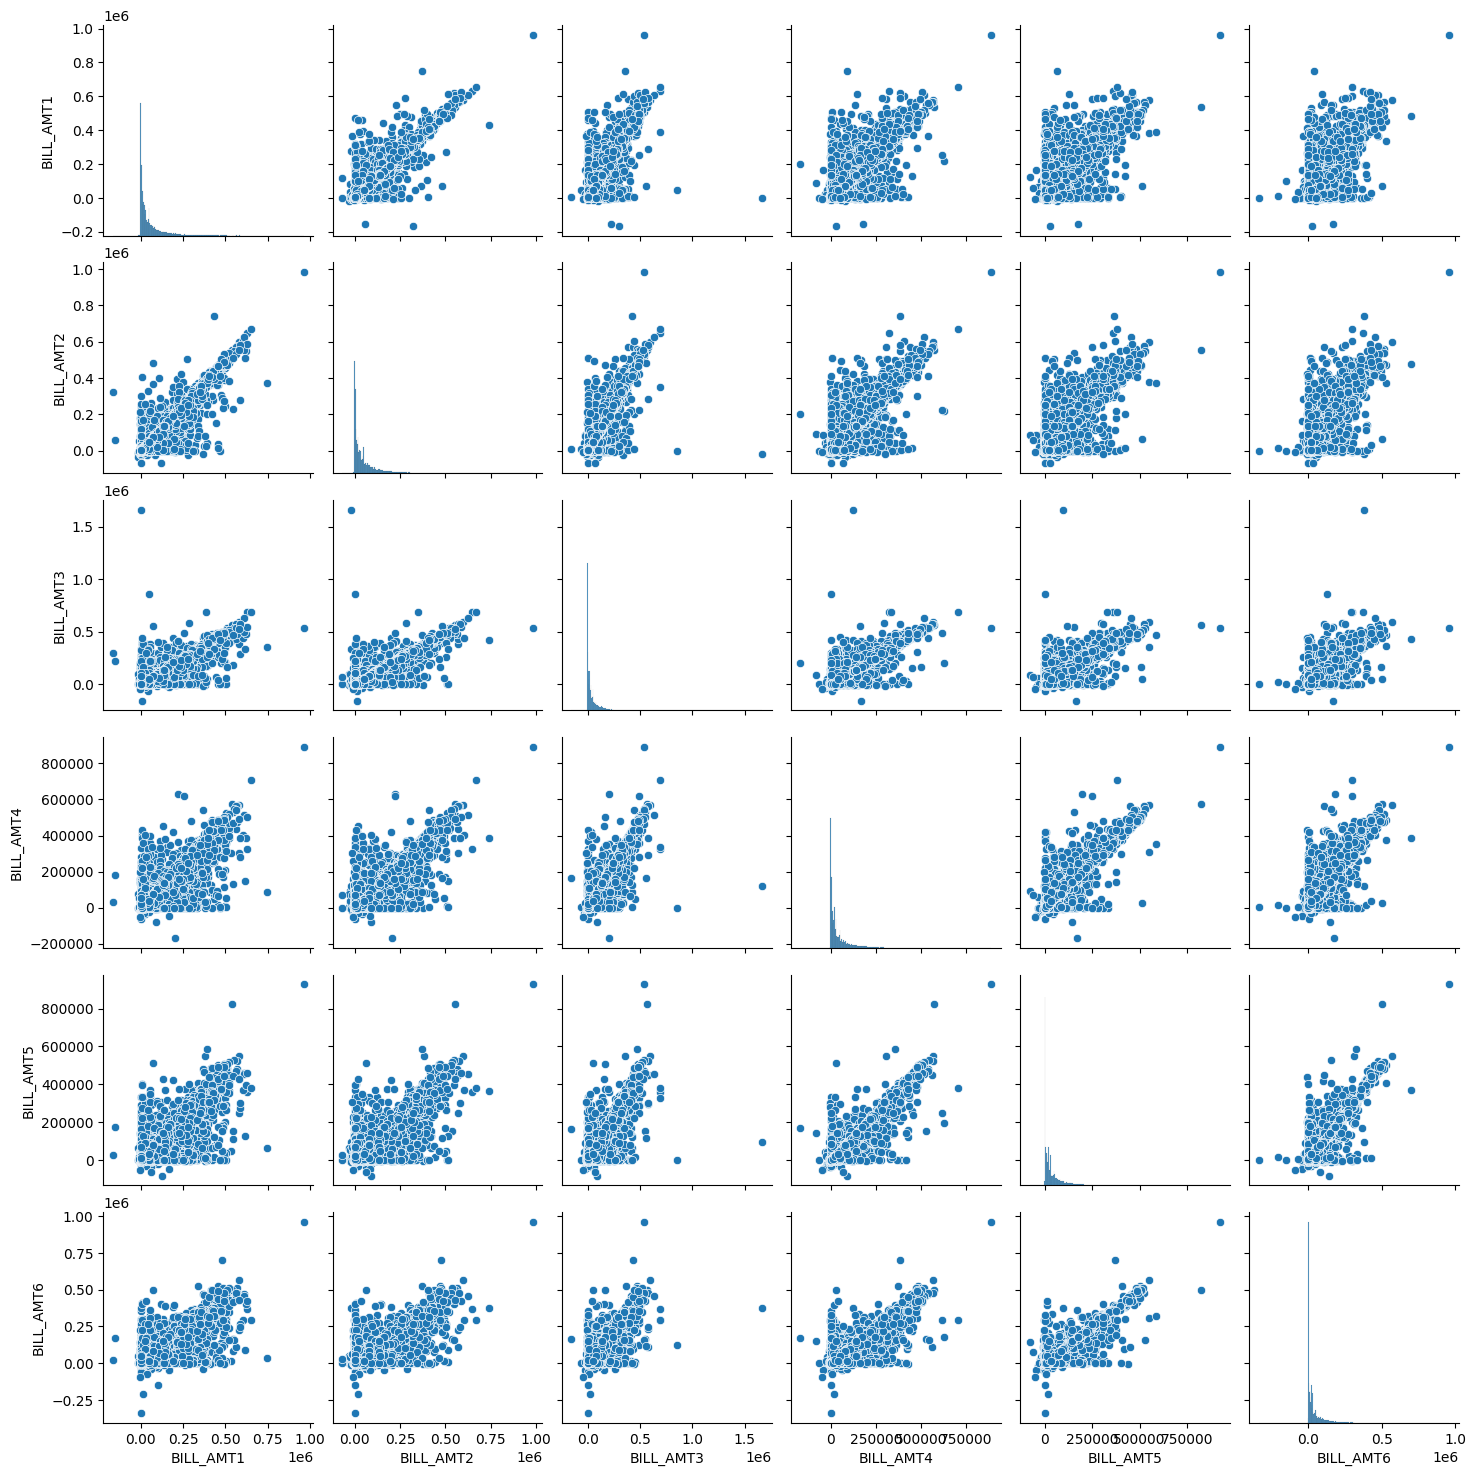

In [41]:
sns.pairplot(data = bill_amnt_data)

### History payment status

In [42]:
pay_data = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

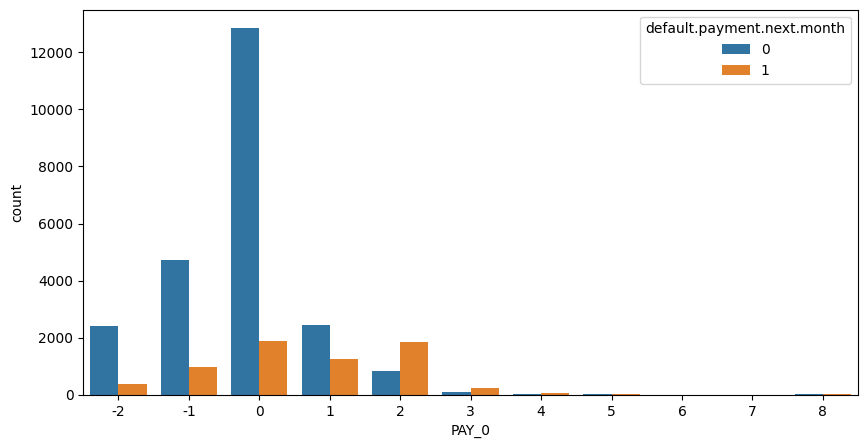

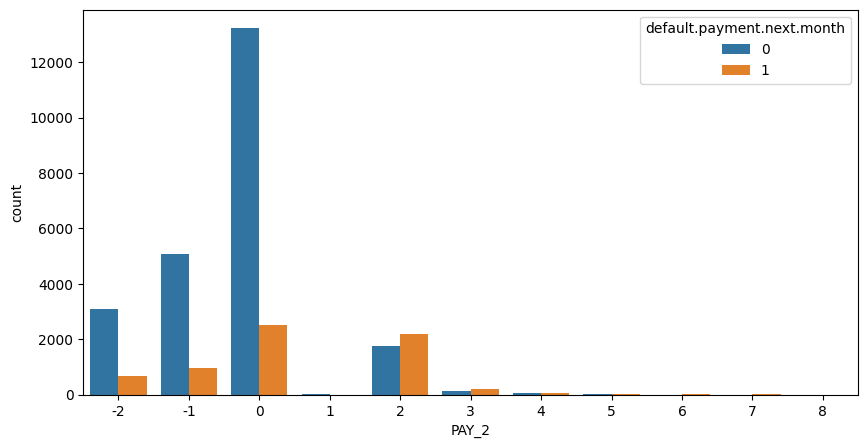

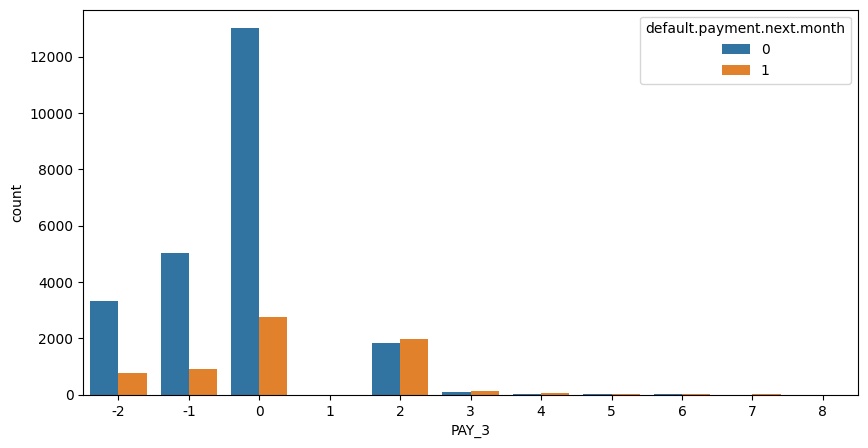

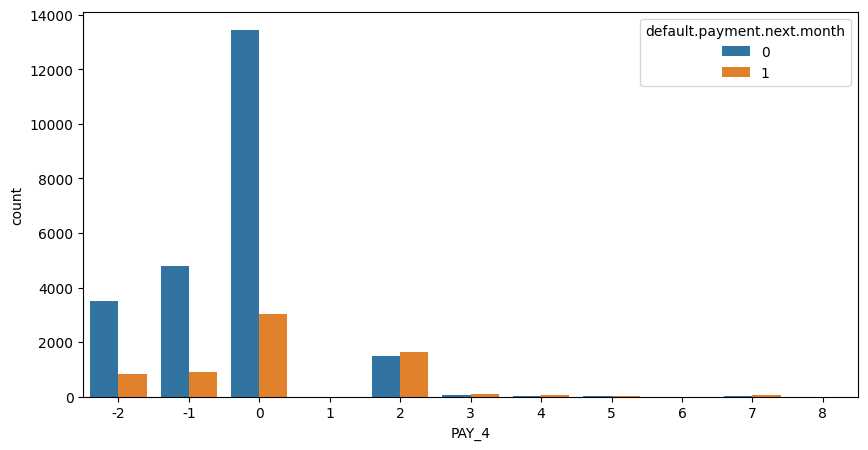

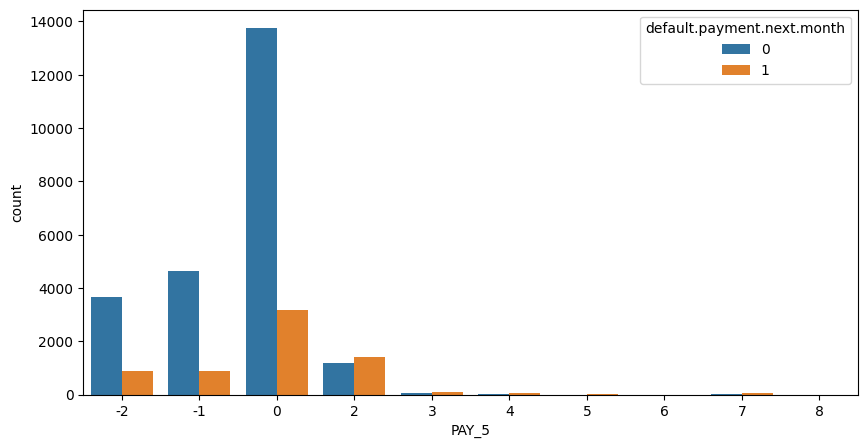

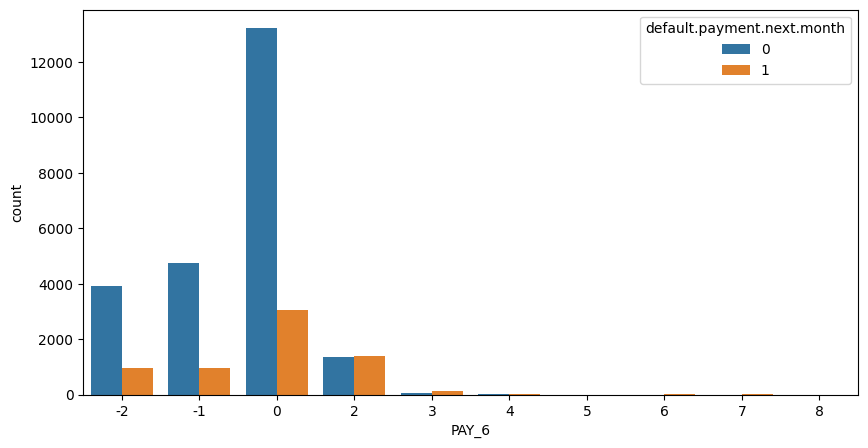

In [43]:
for col in pay_data:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default.payment.next.month', data = data)

### Paid Amount

In [44]:
pay_amnt_data = data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']]

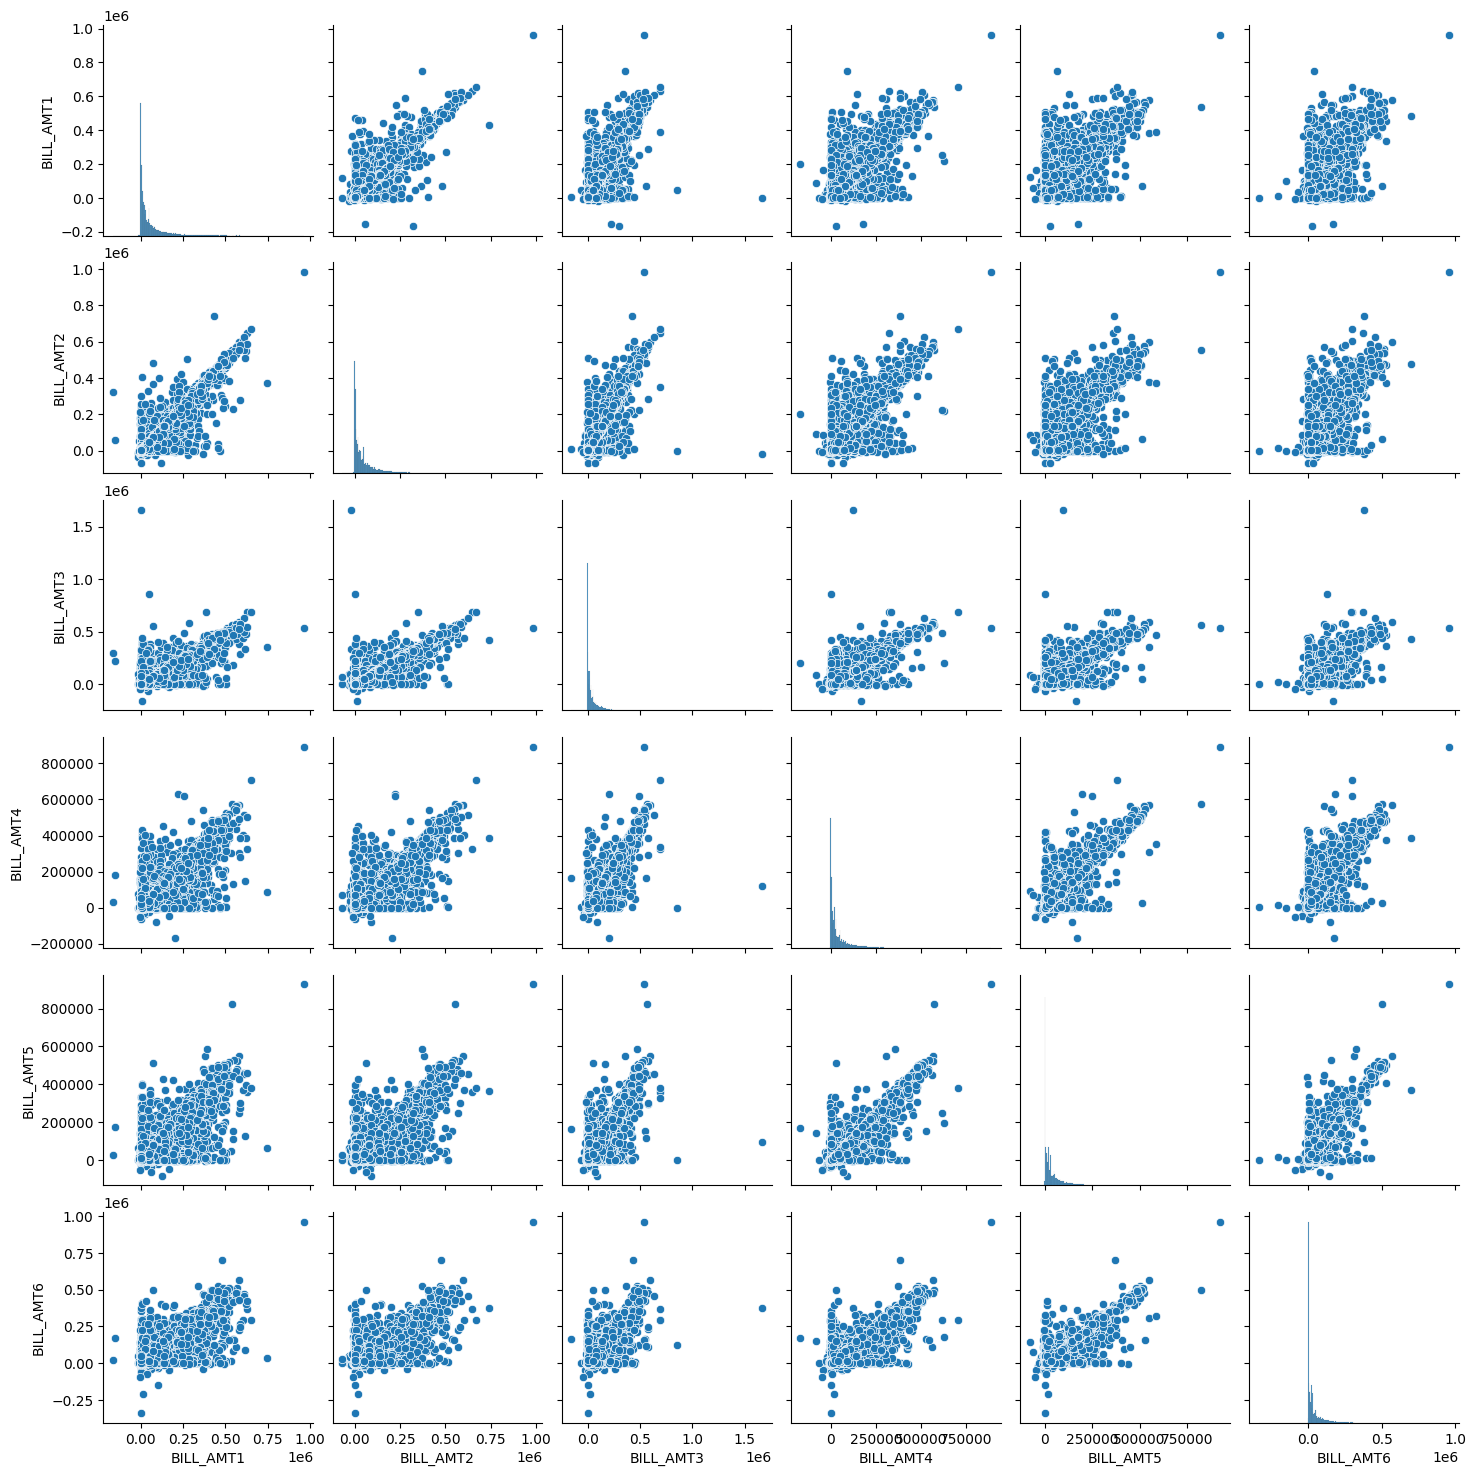

In [45]:
sns.pairplot(data = bill_amnt_data)

# Feature Engineering

> As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [50]:
import logging
from imblearn.over_sampling import SMOTE

In [51]:
def smote_balance(data):
    target_column_name = 'default.payment.next.month'
    sm = SMOTE(sampling_strategy='minority', random_state=42)

    logging.info('Dataset shape prior resampling: {}'.format(data.shape[0]))
    X_resampled, y_resampled = sm.fit_resample(X=data.drop(columns=target_column_name), y=data[target_column_name])
    data = pd.concat([pd.DataFrame(X_resampled, columns=data.drop(columns=target_column_name).columns),
                                pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)
    logging.info('Dataset shape after resampling: {}'.format(data.shape[0]))

    return data

In [52]:
df=smote_balance(data)

In [54]:
df.shape

(46728, 25)

In [56]:
data.shape

(30000, 25)

In [57]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
df.drop(columns=['ID'],axis=1,inplace=True)

In [59]:
# Creating a csv file for further process
df.to_csv("EDA_FE.csv",index=False)